# ch4: Analyzing time series and images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('stocks.csv')

df.head()

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.0000,108.0625,116.5625
1,2000-01-04,102.500003,112.0625,102.0000,112.6250
2,2000-01-05,103.999997,116.0000,101.6875,113.8125
3,2000-01-06,94.999998,114.0000,100.0000,110.0000
4,2000-01-07,99.500001,113.5000,105.8750,111.4375


In [2]:
aapl = df.AAPL
ibm = df.IBM
csco = df.CSCO
msft = df.MSFT

## Multiple time series on common axes

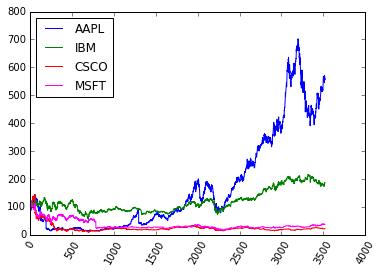

In [3]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

## Multiple time series slices

In [4]:
aapl = df.loc[:,('Date','AAPL')]
aapl['datetime'] = pd.to_datetime(aapl['Date'])
aapl = aapl.set_index('datetime')
aapl.drop(['Date'],axis=1,inplace=True)
aapl.head()

,AAPL
datetime,
2000-01-03,111.937502
2000-01-04,102.500003
2000-01-05,103.999997
2000-01-06,94.999998
2000-01-07,99.500001


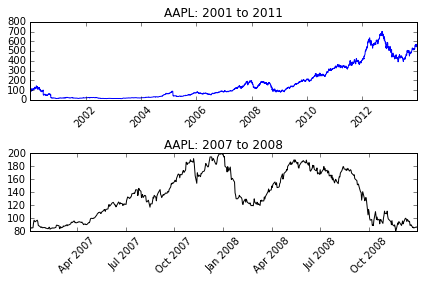

In [5]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.plot(aapl, color='blue')
plt.title('AAPL: 2001 to 2011')
plt.xticks(rotation=45)

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

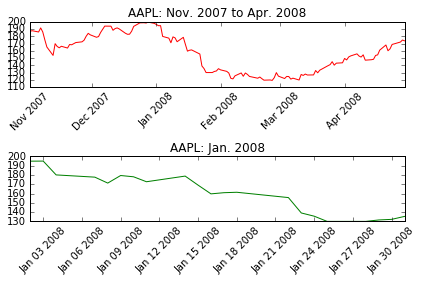

In [6]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view,color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view,color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

## Plotting an inset view

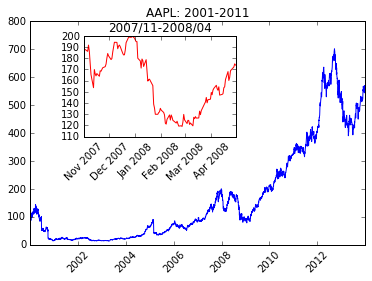

In [7]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

## Plotting moving averages

In [8]:
mean_30 = aapl.resample('30D',how='mean')
mean_75 = aapl.resample('75D',how='mean')
mean_125 = aapl.resample('125D',how='mean')
mean_250 = aapl.resample('250D',how='mean')

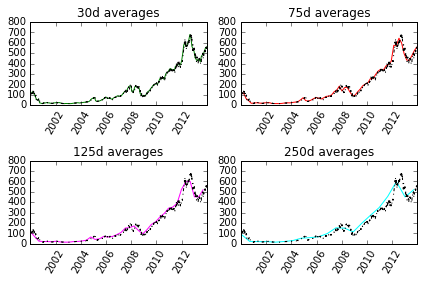

In [9]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125,'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250,'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.tight_layout()
plt.show()

## Plotting moving standard deviations

In [10]:
std_30 = aapl.resample('30D',how='std')
std_75 = aapl.resample('75D',how='std')
std_125 = aapl.resample('125D',how='std')
std_250 = aapl.resample('250D',how='std')

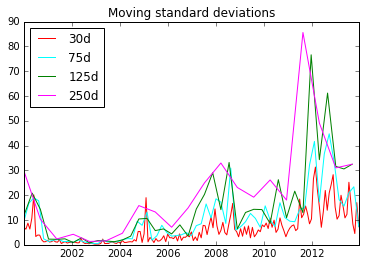

In [11]:
# Plot std_30 in red
plt.plot(std_30, 'red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, 'cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125,'green',label='125d')

# Plot std_250 in magenta
plt.plot(std_250,'magenta',label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

## Extracting a histogram from a grayscale image

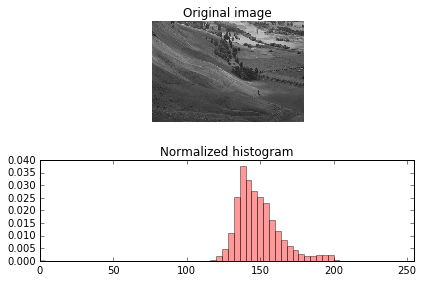

In [12]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image,cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels,bins=64,range=(0,256),normed=True,color='red',alpha=0.4)

# Display the plot
plt.tight_layout()
plt.show()

## Cumulative Distribution Function from an image histogram

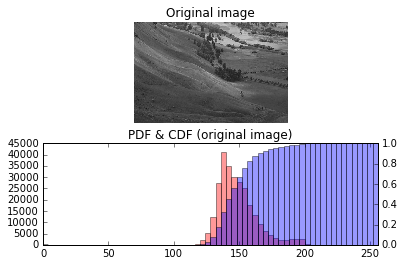

In [14]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()
# comment
# Notice that the histogram is not well centered over the range of possible pixel intensies. The CDF rises sharply near the 
# middle (that relates to the overall grayness of the image).

## Equalizing an image histogram

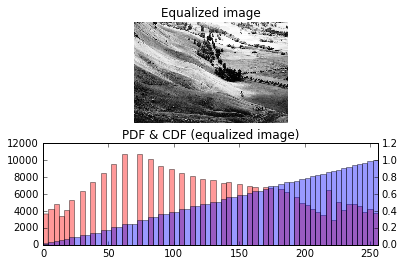

In [15]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()

# comment
# Histogram equalization can help make an image sharper.

## Extracting histograms from a color image

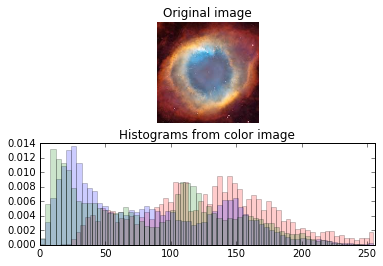

In [16]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()

# comment
#Notice how the histogram generated from this color image differs from the histogram you generated earlier from a grayscale image.

## Extracting bivariate histograms from a color image

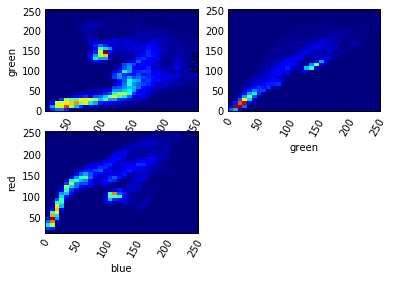

In [17]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels,green_pixels,bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels,blue_pixels,bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels,red_pixels,bins=(32,32))

# Display the plot
plt.show()
